In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv('/content/vgames2.csv')
#duplicatecheck=df.duplicated(['Name'])
#duplicatecheck
#df['Platform'].value_counts()
#print(df['Genre'].value_counts())
#pd.value_counts(df['Platform']=='PC')
#df['Publisher'].value_counts()
#df['Year'].value_counts()
#df1=df[df['NA_Sales'].str.contains('K')]
#df1.replace({'NA_Sales'})

df=df.dropna(axis=0)
df=df.reset_index()
df=df.drop(['Unnamed: 0'], axis=1)
df=df.drop(['index'], axis=1)
#df=df.drop(['Name'], axis=1)
df['Year']=pd.to_numeric(df['Year'])
df1=df['Year'].copy()
df1=pd.Series(df1)
df1=np.where((df1<100) & (df1>=22), df1+1900, df1)
df1=np.where((df1<100) & (df1<22), df1+2000, df1)
df1=pd.Series(df1)
df['Year']=df1
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
vcdf=df['Platform'].value_counts()
vcdf = pd.DataFrame(vcdf)
vcdf.reset_index()

In [ ]:
vcdf=df['Genre'].value_counts()
vcdf = pd.DataFrame(vcdf)
vcdf.reset_index()

In [ ]:
vcdf=df['Publisher'].value_counts()
vcdf = pd.DataFrame(vcdf)
vcdf.reset_index()

In [ ]:

df1=df[df['NA_Sales'].str.contains('K')]
df2=df1['NA_Sales'].copy()
def Toint(a):
  a=a.replace('K','')
  return float(a)
df2=df2.apply(Toint)
df2=df2/1000
df2=df2.astype(str)


In [ ]:

df1=df[df['NA_Sales'].str.contains('M')]
df3=df1['NA_Sales'].copy()
def Toint2(a):
  a=a.replace('M','')
  return a
df3=df3.apply(Toint2)


In [ ]:

dftempo= df['NA_Sales'].copy()

dftempo.iloc[df2.index]=df2
dftempo.iloc[df3.index]=df3
df['NA_Sales']=dftempo
df['NA_Sales']=pd.to_numeric(df['NA_Sales'])

In [ ]:
df1=df[df['EU_Sales'].str.contains('K')]
df2=df1['EU_Sales'].copy()
df2=df2.apply(Toint)
df2=df2/1000
df2=df2.astype(str)
df1=df[df['EU_Sales'].str.contains('M')]
df3=df1['EU_Sales'].copy()
df3=df3.apply(Toint2)
dftempo= df['EU_Sales'].copy()

dftempo.iloc[df2.index]=df2
dftempo.iloc[df3.index]=df3
df['EU_Sales']=dftempo
df['EU_Sales']=pd.to_numeric(df['EU_Sales'])


In [ ]:
df1=df[df['JP_Sales'].str.contains('K')]
df2=df1['JP_Sales'].copy()
df2=df2.apply(Toint)
df2=df2/1000
df2=df2.astype(str)
df1=df[df['JP_Sales'].str.contains('M')]
df3=df1['JP_Sales'].copy()
df3=df3.apply(Toint2)
dftempo= df['JP_Sales'].copy()

dftempo.iloc[df2.index]=df2
dftempo.iloc[df3.index]=df3
df['JP_Sales']=dftempo
df['JP_Sales']=pd.to_numeric(df['JP_Sales'])


In [ ]:
df1=df[df['Other_Sales'].str.contains('K')]
df2=df1['Other_Sales'].copy()
df2=df2.apply(Toint)
df2=df2/1000
df2=df2.astype(str)

df1=df[df['Other_Sales'].str.contains('M')]
df3=df1['Other_Sales'].copy()
df3=df3.apply(Toint2)
dftempo= df['Other_Sales'].copy()

dftempo.iloc[df2.index]=df2
dftempo.iloc[df3.index]=df3
df['Other_Sales']=dftempo
df['Other_Sales']=pd.to_numeric(df['Other_Sales'])

In [ ]:
df['NA_Sales']=df['NA_Sales']*1000
df['EU_Sales']=df['EU_Sales']*1000
df['JP_Sales']=df['JP_Sales']*1000
df['Other_Sales']=df['Other_Sales']*1000



In [ ]:
#1
df['Total_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
DF=df.copy()
DF

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0,40.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0
...,...,...,...,...,...,...,...,...,...,...
16234,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150.0,40.0,0.0,10.0,200.0
16235,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10.0,0.0,0.0,0.0,10.0
16236,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0,790.0
16237,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50.0,50.0,250.0,30.0,380.0


In [ ]:
DFtempo=DF.copy()
NA_Sales1=DFtempo['NA_Sales']!=0
NA_Sales = DFtempo[NA_Sales1]
EU_Sales1=DFtempo['EU_Sales']!=0
EU_Sales = DFtempo[EU_Sales1]
JP_Sales1=DFtempo['JP_Sales']!=0
JP_Sales = DFtempo[JP_Sales1]
Other_Sales1=DFtempo['Other_Sales']!=0
Other_Sales = DFtempo[Other_Sales1]

dataset1=NA_Sales['NA_Sales'].groupby(NA_Sales['Genre']).mean()
dataset2=EU_Sales['EU_Sales'].groupby(EU_Sales['Genre']).mean()
dataset3=JP_Sales['JP_Sales'].groupby(JP_Sales['Genre']).mean()
dataset4=Other_Sales['Other_Sales'].groupby(Other_Sales['Genre']).mean()



data=pd.concat([dataset1,dataset2,dataset3,dataset4], axis=1)
data
data.reset_index(inplace=True)

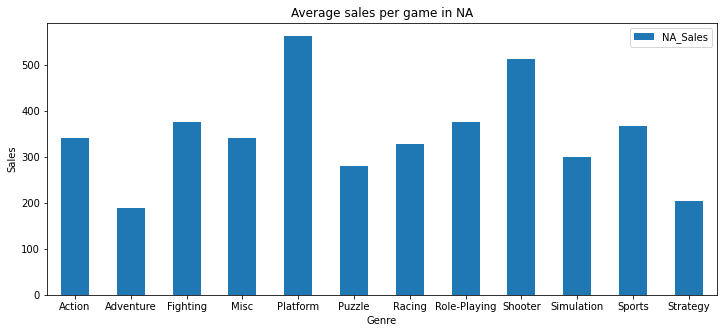

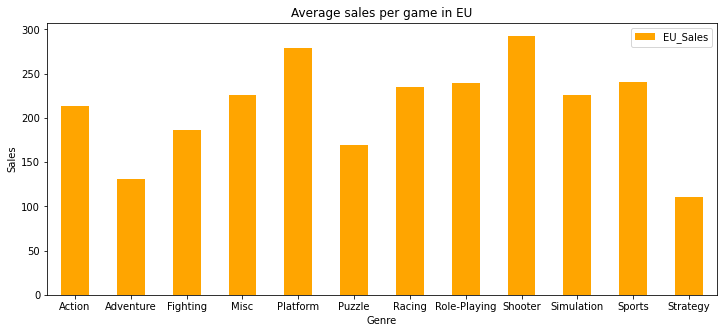

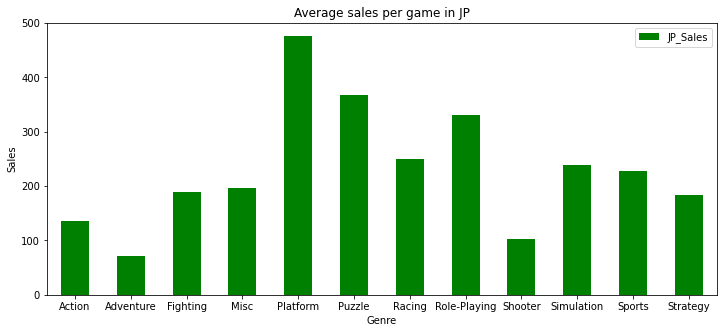

In [ ]:
data.plot.bar(x='Genre', y=['NA_Sales'], xlabel='Genre', ylabel='Sales',rot=0, figsize=(12,5), title='Average sales per game in NA')
data.plot.bar(x='Genre', y=['EU_Sales'], xlabel='Genre', ylabel='Sales',rot=0, figsize=(12,5), title='Average sales per game in EU', color='orange')
data.plot.bar(x='Genre', y=['JP_Sales'], xlabel='Genre', ylabel='Sales',rot=0, figsize=(12,5), title='Average sales per game in JP', color='green');



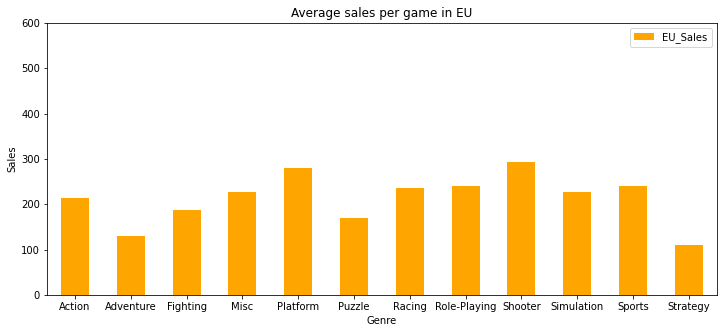

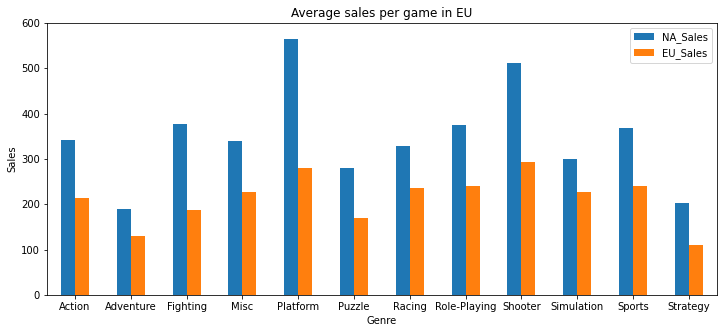

In [ ]:
data.plot.bar(x='Genre', y=['EU_Sales'], xlabel='Genre', ylabel='Sales',rot=0, figsize=(12,5), title='Average sales per game in EU', ylim=(0,600), color='orange');
data.plot.bar(x='Genre', y=['NA_Sales','EU_Sales'], xlabel='Genre', ylabel='Sales',rot=0, figsize=(12,5), title='Average sales per game in EU', ylim=(0,600));


In [ ]:
from scipy.stats import chi2_contingency
dataset1=pd.DataFrame(dataset1)
dataset2=pd.DataFrame(dataset2)
dataset3=pd.DataFrame(dataset3)
obs1 = pd.crosstab(dataset1['NA_Sales'],dataset2['EU_Sales'])
chi2_contingency(obs1, correction=True)




(132.0,
 0.23290755488982084,
 121,
 array([[0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333],
        [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333],
        [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333],
        [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333],
        [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333],
        [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.

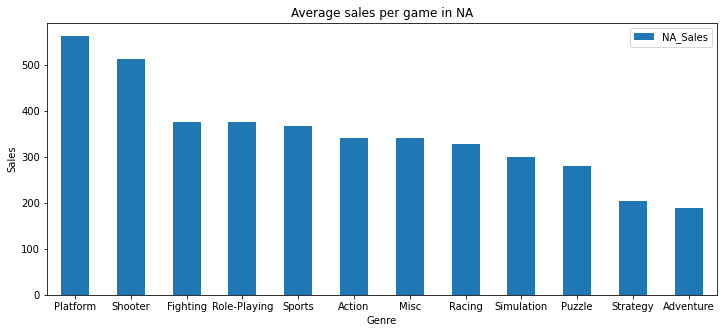

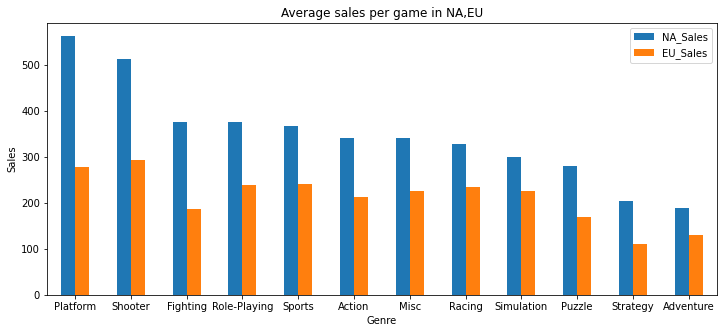

In [ ]:
data2=data.sort_values(by=['NA_Sales'], ascending=False)
data2.plot.bar(x='Genre', y=['NA_Sales'], xlabel='Genre', ylabel='Sales',rot=0, figsize=(12,5), title='Average sales per game in NA')
data2.plot.bar(x='Genre', y=['NA_Sales','EU_Sales'], xlabel='Genre', ylabel='Sales',rot=0, figsize=(12,5), title='Average sales per game in NA,EU')


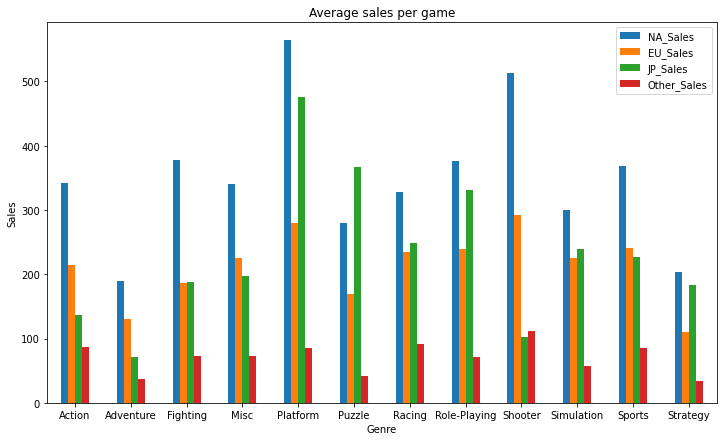

In [ ]:
data.plot.bar(x='Genre', y=['NA_Sales','EU_Sales', "JP_Sales", "Other_Sales"], xlabel='Genre', ylabel='Sales',rot=0, figsize=(12,7), title='Average sales per game');

In [ ]:
DF2=DF.copy()

DF2temp=DF2['Year']

def Todecade(a):
  if (a>1979 and a<1990):
      results='1980s'
  elif (a>1989 and a<2000):
      results='1990s'
  elif (a>1999 and a<2010):
      results='2000s'
  elif (a>2009):
      results='2010s'
  return results

DF2temp=DF2temp.apply(Todecade)
DF2['Year']=DF2temp
DF2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2000s,Action,Destineer,40.0,0.0,0.0,0.0,40.0
1,The Munchables,Wii,2000s,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010s,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0
3,Deal or No Deal: Special Edition,DS,2010s,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010s,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0
...,...,...,...,...,...,...,...,...,...,...
16234,Ice Age 2: The Meltdown,GC,2000s,Platform,Vivendi Games,150.0,40.0,0.0,10.0,200.0
16235,Rainbow Islands: Revolution,PSP,2000s,Action,Rising Star Games,10.0,0.0,0.0,0.0,10.0
16236,NBA 2K16,PS3,2010s,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0,790.0
16237,Toukiden: The Age of Demons,PSV,2010s,Action,Tecmo Koei,50.0,50.0,250.0,30.0,380.0


In [ ]:
Yearsale=DF2['Total_Sales'].groupby(DF2['Year']).sum()
Yearsale

Year
1980s     375980.0
1990s    1275190.0
2000s    4612340.0
2010s    2491740.0
Name: Total_Sales, dtype: float64

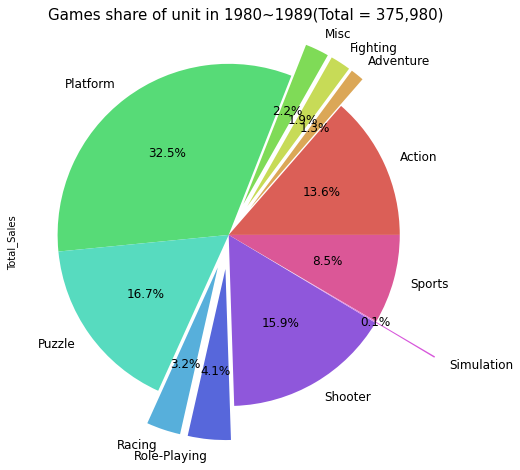

In [ ]:
import seaborn as sns
DF1980=DF2[DF2['Year']=='1980s']
DF1990=DF2[DF2['Year']=='1990s']
DF2000=DF2[DF2['Year']=='2000s']
DF2010=DF2[DF2['Year']=='2010s']
dataset1=DF1980['Total_Sales'].groupby(DF1980["Genre"]).sum()
dataset2=DF1990['Total_Sales'].groupby(DF1990["Genre"]).sum()
dataset3=DF2000['Total_Sales'].groupby(DF2000["Genre"]).sum()
dataset4=DF2010['Total_Sales'].groupby(DF2010["Genre"]).sum()

colors = sns.color_palette('hls',len(dataset1.index))
explode = [0,0.2,0.2,0.2,0,0,0.2,0.2,0,0.4,0]
dataset1.plot(kind='pie',figsize=(8,8), explode=explode, colors=colors, autopct='%.1f%%',textprops={'size': 12})
plt.title('Games share of unit in 1980~1989(Total = 375,980)', size=15)
plt.axis('equal');






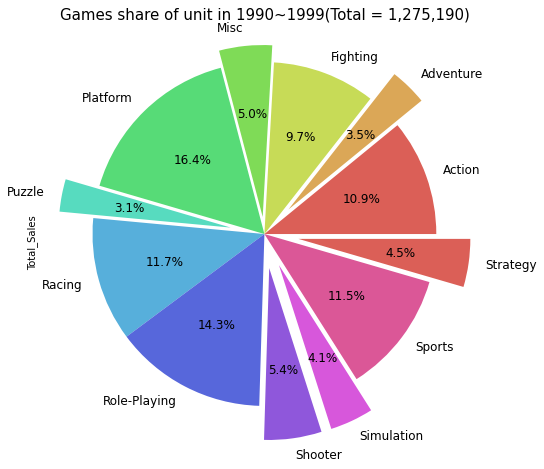

In [ ]:
colors = sns.color_palette('hls',len(dataset1.index))
explode = [0,0.2,0,0.1,0,0.2,0,0,0.2,0.2,0,0.2]
dataset2.plot(kind='pie',figsize=(8,8), explode=explode, colors=colors, autopct='%.1f%%',textprops={'size': 12})
plt.title('Games share of unit in 1990~1999(Total = 1,275,190)', size=15, position=(0.5,1.0))
plt.axis('equal');

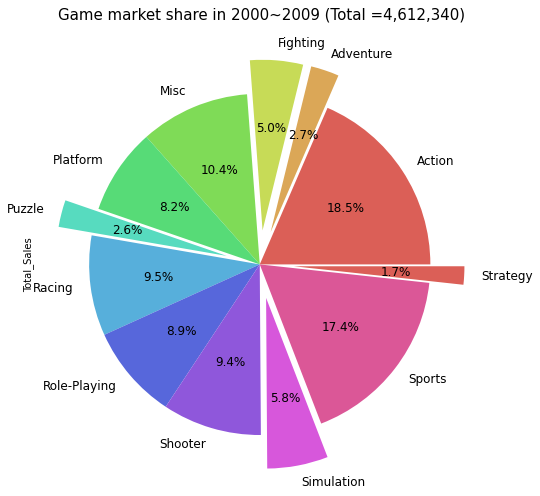

In [ ]:
colors = sns.color_palette('hls',len(dataset1.index))
explode = [0,0.2,0.2,0,0,0.2,0,0,0,0.2,0,0.2]
dataset3.plot(kind='pie',figsize=(8,8), explode=explode, colors=colors, autopct='%.1f%%',textprops={'size': 12})
plt.title('Game market share in 2000~2009 (Total =4,612,340)', size=15, position=(0.5,1.05))
plt.axis('equal');

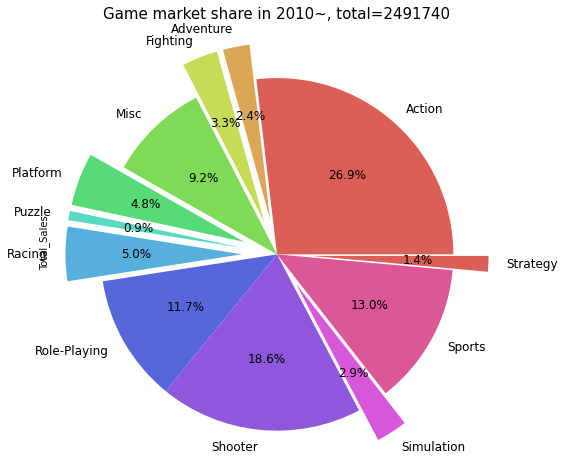

In [ ]:
colors = sns.color_palette('hls',len(dataset1.index))
explode = [0,0.2,0.2,0,0.2,0.2,0.2,0,0,0.2,0,0.2]
dataset4.plot(kind='pie',figsize=(8,8), explode=explode, colors=colors, autopct='%.1f%%',textprops={'size': 12})
plt.title('Game market share in 2010~, total=2491740', size=15)
plt.axis('equal');

In [ ]:
#DF3=DF.copy()
#DF3['Platform'].value_counts()
#DF3DS=DF3[DF3['Platform']=='DS']
#pd.value_counts(DF3DS["Genre"])
#DF3PS2=DF3[DF3["Platform"]=='PS2']
#pd.value_counts(DF3PS2["Genre"])


Sports          389
Action          344
Misc            217
Racing          212
Adventure       195
Role-Playing    182
Shooter         158
Fighting        146
Platform        101
Simulation       89
Strategy         70
Puzzle           18
Name: Genre, dtype: int64

In [ ]:
DF2Platform=DF2.groupby(['Year','Platform'])['Name'].count()
DF2Platform=pd.DataFrame(DF2Platform)
DF2Platform


Name
Year  Platform      
1980s 2600       115
      DS           1
      GB          11
      NES         75
      PC           2
1990s 3DO          3
      DC          21
      GB          59
      GEN         27
      GG           1
      N64        244
      NES         23
      NG          12
      PC          38
      PCFX         1
      PS         913
      SAT        173
      SCD          6
      SNES       239
      TG16         2
      WS           2
2000s DC          31
      DS        1614
      GB          27
      GBA        784
      GC         541
      N64         69
      PC         440
      PS         272
      PS2       2078
      PS3        414
      PSP        694
      WS           4
      Wii        834
      X360       551
      XB         799
2010s 3DS        498
      DS         512
      PC         455
      PS2         43
      PS3        884
      PS4        335
      PSP        498
      PSV        409
      Wii        450
      WiiU       143
      X360       680
      XOne       212

In [ ]:
DFrank=DF.sort_values(by=['Total_Sales'],ascending=False)
DFrank=DFrank.reset_index()
DFrank=DFrank[:100]
RankGenre=DFrank['Name'].groupby(DFrank["Genre"]).count()
RankGenre=pd.DataFrame(RankGenre)
RankGenre


,Name
Genre,
Action,10
Adventure,1
Fighting,3
Misc,9
Platform,14
Puzzle,3
Racing,13
Role-Playing,14
Shooter,22


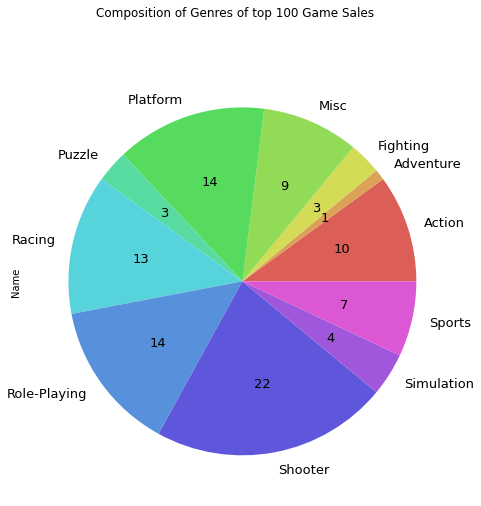

In [ ]:
colors = sns.color_palette('hls',len(dataset1.index))
RankGenre.plot(kind='pie',figsize=(8,8), textprops={'size': 13}, title='Composition of Genres of top 100 Game Sales', colors=colors, autopct='%.0f', legend=False, subplots=True);


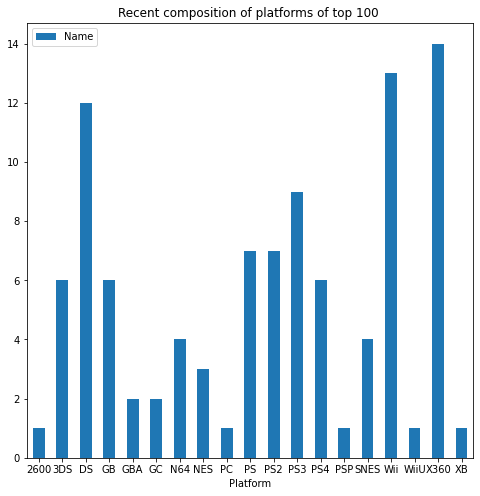

In [ ]:
RankPlatform=DFrank['Name'].groupby(DFrank["Platform"]).count()
RankPlatform=pd.DataFrame(RankPlatform)
RankPlatform.plot(kind='bar', figsize=(8,8), rot=0, title='Recent composition of platforms of top 100 ');


In [ ]:
DFSelect=DF2[(DF2['Year']=='2010s')]
DFrank1=DFSelect.sort_values(by=['Total_Sales'],ascending=False)
DFrank1=DFrank1.reset_index()
DFrank1=DFrank1[:100]
RankGenre1=DFrank1['Name'].groupby(DFrank1["Genre"]).count()
RankGenre1=pd.DataFrame(RankGenre1)

whole=RankGenre.copy()
recent=RankGenre1.copy()

whole.columns=['Whole']
recent.columns=['Recent']
piedata= pd.concat([whole, recent], axis=1)
piedata

,Whole,Recent
Genre,,
Action,10.0,25.0
Adventure,1.0,NaN
Fighting,3.0,2.0
Misc,9.0,10.0
Platform,14.0,6.0
Puzzle,3.0,NaN
Racing,13.0,5.0
Role-Playing,14.0,11.0
Shooter,22.0,27.0


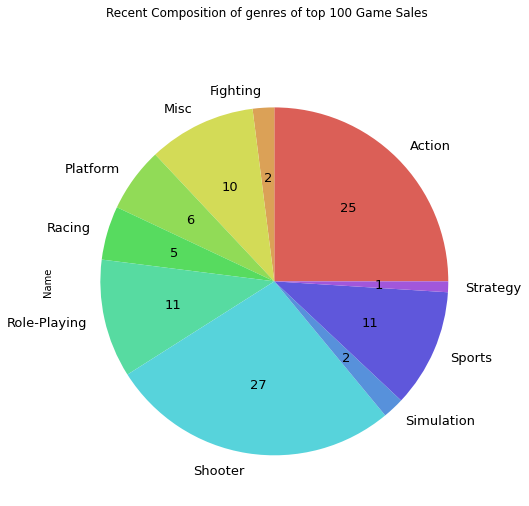

In [ ]:
RankGenre1.plot(kind='pie',figsize=(8,8), textprops={'size': 13}, title='Recent Composition of genres of top 100 Game Sales', colors=colors, autopct='%.0f', legend=False, subplots=True);

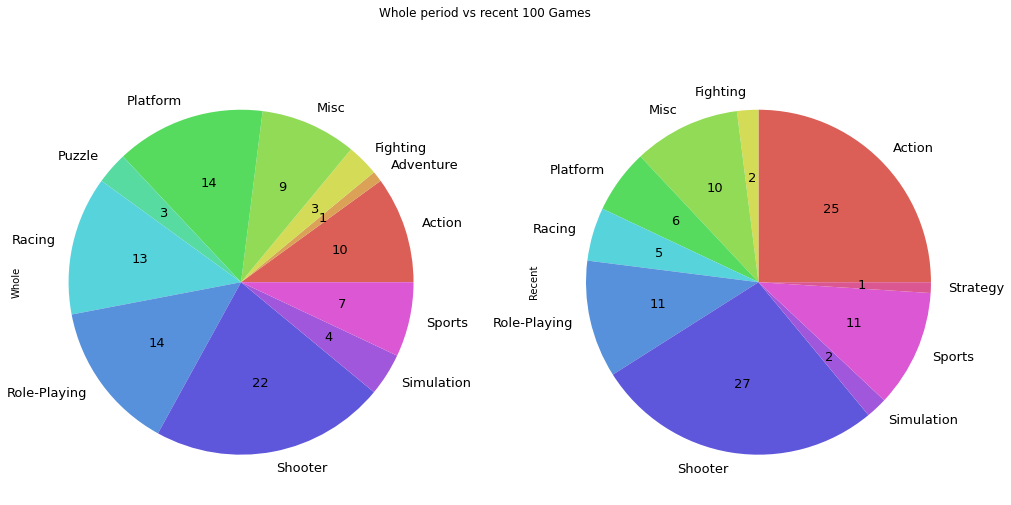

In [ ]:
piedata.plot(kind='pie',figsize=(17,8), textprops={'size': 13}, title='Whole period vs recent 100 Games', colors=colors, autopct=lambda p: '{:.0f}'.format(round(p)) if p > 0 else '', legend=False, subplots=True);

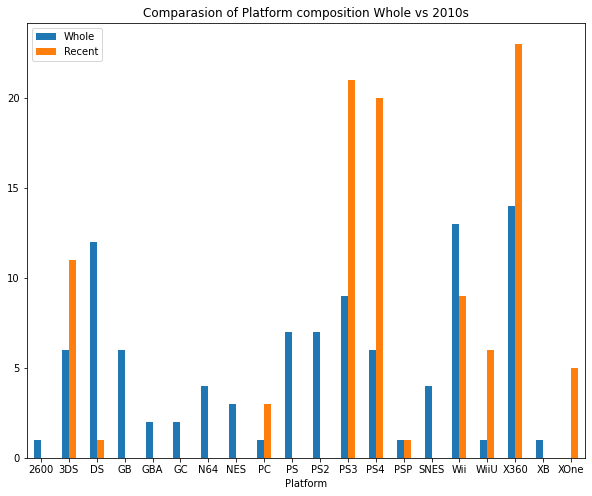

In [ ]:
RankPlatform1=DFrank1['Name'].groupby(DFrank1["Platform"]).count()
RankPlatform1=pd.DataFrame(RankPlatform1)
whole1=RankPlatform.copy()
recent1=RankPlatform1.copy()
whole1.columns=['Whole']
recent1.columns=['Recent']
bardata= pd.concat([whole1, recent1], axis=1)

bardata.reset_index

bardata['Platform']=bardata.index
bardata.plot.bar(x='Platform', y=['Whole', 'Recent'], xlabel='Platform', figsize=(10,8), rot=0, title="Comparasion of Platform composition Whole vs 2010s");

In [ ]:
A=DF.sort_values(by=['Total_Sales'],ascending=False)
A

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2855,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
12315,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
7672,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0
...,...,...,...,...,...,...,...,...,...,...
7336,NEVES,DS,2007,Puzzle,Ignition Entertainment,10.0,0.0,0.0,0.0,10.0
7360,Blackthorne,GBA,2003,Action,Activision,10.0,0.0,0.0,0.0,10.0
15440,Best Of Tests,DS,2008,Puzzle,Conspiracy Entertainment,10.0,0.0,0.0,0.0,10.0
11631,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0.0,10.0,0.0,0.0,10.0
